<img src = "https://imgur.com/HE0kDhA.jpg"  align = "center">

# **Soal Praktikum Convolutional Neural Network**

Pada tugas praktikum modul 2 CNN kali ini anda diminta untuk membuat model dengan kombinasi layer Convolutional, Pooling, dan Fully Connected Layer

Praktikum kali ini anda diminta menggunakan dataset breast cancer yang bisa diunduh menggunakan kaggle API dari: https://www.kaggle.com/forderation/breakhis-400x


Dataset tersebut merupakan gambar mikroskopis dengan zoom sebesar 400x pada pasien yang mengalami kanker payudara (Breast Cancer), dimana pada dataset tesebut dibagi menjadi dua kelas yaitu Tumor ganas (Malignant) dan Tumor jinak (Benign). Dataset sudah dibagi menjadi folder training dan testing yang berbeda dengan struktur sebagai berikut:
- BreaKHis 400X/train/benign/*kumpulan gambar
- BreaKHis 400X/train/malignant/*kumpulan gambar
- BreaKHis 400X/test/benign/*kumpulan gambar
- BreaKHis 400X/test/malignant/*kumpulan gambar

Anda diminta membuat 2 scenario modelling dengan kriteria sebagai berikut:
- 1. membuat model training dengan CNN, diantara layer convolution buatlah pooling menggunakan metode **maxpooling** kemudian diakhir layer CNN tambahkan **globalmaxpooling** sebelum melakukan flatten (model1)
- 2. membuat model training dengan CNN, diantara layer convolution buatlah pooling menggunakan metode **averagepooling** kemudian diakhir layer CNN tambahkan **globalaveragepooling** sebelum melakukan flatten (model2)



---



# 1. Load Data (total 15 point)

Task yang perlu dikerjakan:
1. Unduh dataset tersebut kemudian lakukan ektraksi zip (point 5)
2. Menampilkan hasil jumlah pembagian (point 5)
3. Menampilkan sample sebagian gambar dari kelas yang berbeda dengan ukuran 2 baris x 4 kolom (point 5)



In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle(1).json to kaggle(1).json
User uploaded file "kaggle(1).json" with length 75 bytes
mv: cannot stat 'kaggle.json': No such file or directory


In [ ]:
# jika anda ingin menggunakan kaggle API untuk mengunduh dataset gunakan
# kode berikut untuk membantu anda membuat config kaggle.json
# pastikan anda mendaftar akun kaggle terlebih dahulu
# kemudian menuju halaman my account dan buat token API anda

api_token = {"username":"mochrosidnoviansyah","key":"d774b2dc445aa84c7da101802886b7a3"}
import json
import zipfile
import os
with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
# hasil pengerjaan point 1.1
!kaggle datasets download "forderation/breakhis-400x"

 99% 796M/803M [00:09<00:00, 27.1MB/s]
100% 803M/803M [00:09<00:00, 88.8MB/s]


In [ ]:
# Ekstrak dataset

import os
import zipfile

local_zip = '/content/breakhis-400x.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
base_dir ='/content/BreaKHis 400X'

train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

train_benign_dir = os.path.join(train_dir, 'benign')
train_malignant_dir = os.path.join(train_dir, 'malignant')

test_benign_dir = os.path.join(test_dir, 'benign')
test_malignant_dir = os.path.join(test_dir, 'malignant')

In [ ]:
# hasil pengerjaan point 1.2
print("total training benign images:", len(os.listdir(train_benign_dir))) #cek jumlah file
print("total training malignant images:", len(os.listdir(train_malignant_dir)))
print("total test benign images:", len(os.listdir(test_benign_dir)))
print("total test malignant images:", len(os.listdir(test_malignant_dir)))

total training benign images: 371
total training malignant images: 777
total test benign images: 176
total test malignant images: 369


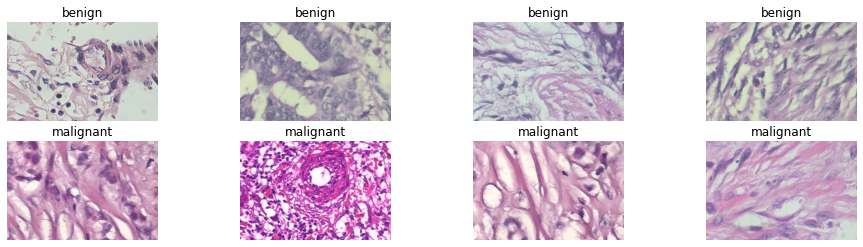

In [ ]:
# hasil pengerjaan point 1.3
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 2
ncols = 4

pic_index = 0 #mengulang gambar

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 2)

pic_index += 8
next_benign_pix = [os.path.join(train_benign_dir, fname) 
                for fname in os.listdir(train_benign_dir)[pic_index-4:pic_index]]
next_malignant_pix = [os.path.join(train_malignant_dir, fname) 
                for fname in os.listdir(train_malignant_dir)[pic_index-4:pic_index]]

for i, img_path in enumerate(next_benign_pix+next_malignant_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)
  if img_path in next_benign_pix:
    sp.set_title("benign")
  else:
    sp.set_title("malignant")
  img = mpimg.imread(img_path)
  plt.imshow(img)
 
plt.show()

# 2. Preprocessing (total 15 point)

Task yang perlu dikerjakan:
1. Gather data training dan testing dengan ukuran gambar **250x250** (total 5 point)
2. Normalisasi dataset (total 5 point)
3. Membuat label encoder (total 5 point)


In [ ]:
import cv2
import numpy as np

# Gather data train
train_data = [] # disimpan dalam bentuk array
train_label = []
for r, d, f in os.walk(train_dir):
    for file in f:
        if ".png" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (250,250)) #ukuran gambar
            train_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            train_label.append(label)

train_data = np.array(train_data)
train_label = np.array(train_label)

In [ ]:
# Gather data validation
val_data = []
val_label = []
for r, d, f in os.walk(test_dir):
    for file in f:
        if ".png" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (250,250))
            val_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            val_label.append(label)

val_data = np.array(val_data)
val_label = np.array(val_label)

In [ ]:
# hasil pengerjaan point 2.1
#Tampilkan shape dari data train dan data validation
print("Train Data = ", train_data.shape)
print("Train Label = ", train_label.shape)
print("Validation Data = ", val_data.shape)
print("Validation Label = ", val_label.shape)

Train Data =  (1148, 250, 250, 3)
Train Label =  (1148,)
Validation Data =  (545, 250, 250, 3)
Validation Label =  (545,)


In [ ]:
# hasil pengerjaan point 2.2
# Normalisasi dataset, membuat dan menampilkan hasil dari label encoder
from sklearn.preprocessing import LabelEncoder

print("Data sebelum di-normalisasi ", train_data[0][0][0])

x_train = train_data.astype('float32') / 255.0
x_val = val_data.astype('float32') / 255.0
print("Data setelah di-normalisasi ", x_train[0][0][0])

Data sebelum di-normalisasi  [176 162 162]
Data setelah di-normalisasi  [0.6901961  0.63529414 0.63529414]


In [ ]:
# hasil pengerjaan point 2.3
from sklearn.preprocessing import LabelEncoder
print("Label sebelum di-encoder ", train_label[570:580])
lb = LabelEncoder()
y_train = lb.fit_transform(train_label)
y_val = lb.fit_transform(val_label)

print("Label setelah di-encoder", y_train[570:580])
print("Class Label encoder", lb.classes_)

Label sebelum di-encoder  ['malignant' 'malignant' 'malignant' 'malignant' 'malignant' 'malignant'
 'malignant' 'malignant' 'malignant' 'malignant']
Label setelah di-encoder [1 1 1 1 1 1 1 1 1 1]
Class Label encoder ['benign' 'malignant']


# 3. Modelling (total 30 point)

Task yang perlu dikerjakan:
1. Membuat & menampilkan scenario Pertama (total 10 point)
2. Membuat & menampilkan summary model scenario Kedua (total 10 point)
3. Training model scenario Pertama (total 5 point)
4. Training model scenario Kedua (total 5 point)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, GlobalMaxPool2D, GlobalAvgPool2D, Flatten

In [ ]:
# Model Scenario Pertama
# Feature Extraction Layer
model = Sequential()

model.add(InputLayer(input_shape=[250,250,3]))
model.add(Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(GlobalMaxPool2D())
model.add(Flatten())

In [ ]:
# Model Scenario Kedua
# Feature Extraction Layer
model2 = Sequential()

model2.add(InputLayer(input_shape=[250,250,3]))
model2.add(Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu'))
model2.add(MaxPool2D(pool_size=2, padding='same'))
model2.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model2.add(MaxPool2D(pool_size=2, padding='same'))
model2.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model2.add(MaxPool2D(pool_size=2, padding='same'))
model2.add(GlobalAvgPool2D())
model2.add(Flatten())

In [ ]:
# Fully Connected Layer
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Print model summary
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 250, 250, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 125, 125, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 63, 63, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
global_max_pooling2d (Global (None, 64)                0

In [ ]:
# Compile model
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(lr=0.001), 
              loss='binary_crossentropy', 
              metrics=['acc'])

In [ ]:
# Training model scenario Pertama
H = model.fit(x_train, y_train, batch_size=20, epochs=15, validation_data=(x_val, y_val))

Epoch 1/15
58/58 [==============================] - 2s 30ms/step - loss: 0.6158 - acc: 0.6646 - val_loss: 0.5896 - val_acc: 0.6771
Epoch 2/15
58/58 [==============================] - 1s 25ms/step - loss: 0.5292 - acc: 0.7352 - val_loss: 0.5120 - val_acc: 0.7817
Epoch 3/15
58/58 [==============================] - 1s 25ms/step - loss: 0.4640 - acc: 0.8014 - val_loss: 0.4590 - val_acc: 0.8220
Epoch 4/15
58/58 [==============================] - 1s 25ms/step - loss: 0.4069 - acc: 0.8484 - val_loss: 0.3998 - val_acc: 0.8679
Epoch 5/15
58/58 [==============================] - 1s 25ms/step - loss: 0.3885 - acc: 0.8554 - val_loss: 0.3914 - val_acc: 0.8495
Epoch 6/15
58/58 [==============================] - 2s 26ms/step - loss: 0.4025 - acc: 0.8484 - val_loss: 0.4670 - val_acc: 0.7908
Epoch 7/15
58/58 [==============================] - 1s 26ms/step - loss: 0.3671 - acc: 0.8659 - val_loss: 0.3966 - val_acc: 0.8477
Epoch 8/15
58/58 [==============================] - 1s 26ms/step - loss: 0.3436 - a

In [ ]:
# Fully Connected Layer
model2.add(Dense(128, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

In [ ]:
# Print model summary
print(model2.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 250, 250, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 125, 125, 16)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 125, 125, 32)      4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 63, 63, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 64)               

In [ ]:
# Compile model
from tensorflow.keras.optimizers import Adam

model2.compile(optimizer=Adam(lr=0.001), 
              loss='binary_crossentropy', 
              metrics=['acc'])

In [ ]:
# Training model scenario Kedua
H2 = model2.fit(x_train, y_train, batch_size=20, epochs=15, validation_data=(x_val, y_val))

Epoch 1/15
58/58 [==============================] - 2s 29ms/step - loss: 0.5950 - acc: 0.6768 - val_loss: 0.5411 - val_acc: 0.6789
Epoch 2/15
58/58 [==============================] - 1s 25ms/step - loss: 0.4989 - acc: 0.7779 - val_loss: 0.4999 - val_acc: 0.8055
Epoch 3/15
58/58 [==============================] - 1s 26ms/step - loss: 0.4557 - acc: 0.8197 - val_loss: 0.4711 - val_acc: 0.8257
Epoch 4/15
58/58 [==============================] - 1s 25ms/step - loss: 0.4487 - acc: 0.8171 - val_loss: 0.4950 - val_acc: 0.7908
Epoch 5/15
58/58 [==============================] - 1s 25ms/step - loss: 0.4264 - acc: 0.8380 - val_loss: 0.4749 - val_acc: 0.8330
Epoch 6/15
58/58 [==============================] - 1s 26ms/step - loss: 0.4417 - acc: 0.8275 - val_loss: 0.4633 - val_acc: 0.8495
Epoch 7/15
58/58 [==============================] - 1s 25ms/step - loss: 0.4190 - acc: 0.8458 - val_loss: 0.4401 - val_acc: 0.8495
Epoch 8/15
58/58 [==============================] - 1s 26ms/step - loss: 0.4034 - a

# 4. Result (total 25 point)

Task yang perlu dikerjakan:
1. Plot hasil akurasi dan loss dari kedua model menjadi 1 canvas (10 point)
2. Melakukan uji coba dari salah satu gambar test pada model 1 dan model 2 (10 point)
3. Klasifikasi report dari kedua model (5 point)
4. Jika hasil akurasi model CNN klasifikasi report kedua model diatas 90% (15 point)

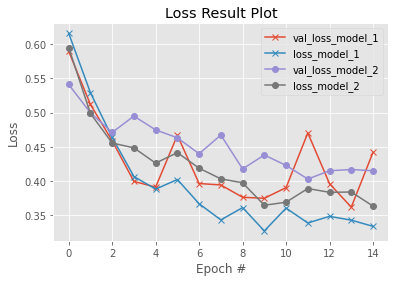

In [ ]:
# Hasil pengerjaan point 4.1
%matplotlib inline

import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 15), H.history["val_loss"], marker="x", label="val_loss_model_1")
plt.plot(np.arange(0, 15), H.history["loss"], marker="x", label="loss_model_1")
plt.plot(np.arange(0, 15), H2.history["val_loss"],marker="o", label="val_loss_model_2")
plt.plot(np.arange(0, 15), H2.history["loss"],marker="o", label="loss_model_2")
plt.title("Loss Result Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

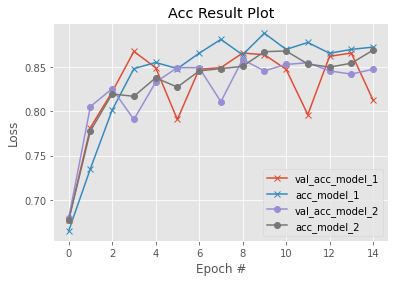

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 15), H.history["val_acc"], marker="x", label="val_acc_model_1")
plt.plot(np.arange(0, 15), H.history["acc"], marker="x", label="acc_model_1")
plt.plot(np.arange(0, 15), H2.history["val_acc"],marker="o", label="val_acc_model_2")
plt.plot(np.arange(0, 15), H2.history["acc"],marker="o", label="acc_model_2")
plt.title("Acc Result Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Actual Class:  malignant
Hasil Prediksi Model 1
Predicted Class malignant
Hasil Prediksi Model 2
Predicted Class malignant


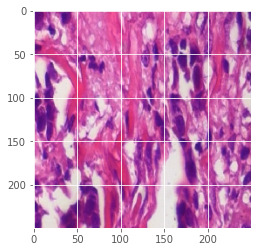

In [ ]:
# Hasil pengerjaan point 4.2
from tensorflow.keras.preprocessing import image
def predict(file):
  img = image.load_img(file, target_size=(250, 250))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  # x = preprocess_input(x)
  preds1 = model.predict_classes(x)
  preds2 = model2.predict_classes(x)
  print('Actual Class: ', file[28:37])
  print('Hasil Prediksi Model 1')
  print('Predicted Class', 'benign' if preds1==0 else 'malignant')
  print('Hasil Prediksi Model 2')
  print('Predicted Class', 'benign' if preds2==0 else 'malignant')
  plt.imshow(img)

file="/content/BreaKHis 400X/test/malignant/SOB_M_DC-14-15792-400-009.png"
predict(file)

In [ ]:
# Hasil pengerjaan point 4.3
from sklearn.metrics import classification_report

pred = model.predict(x_val)
labels = (pred > 0.5).astype(np.int)

pred2 = model2.predict(x_val)
labels2 = (pred2 > 0.5).astype(np.int)

print("model 1")
print(classification_report(y_val, labels))

print("model 2")
print(classification_report(y_val, labels2))

model 1
              precision    recall  f1-score   support

           0       0.92      0.46      0.61       176
           1       0.79      0.98      0.88       369

    accuracy                           0.81       545
   macro avg       0.86      0.72      0.75       545
weighted avg       0.83      0.81      0.79       545

model 2
              precision    recall  f1-score   support

           0       0.83      0.66      0.74       176
           1       0.85      0.93      0.89       369

    accuracy                           0.85       545
   macro avg       0.84      0.80      0.82       545
weighted avg       0.85      0.85      0.84       545

